In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('PH-Sales.csv')

In [3]:
dataset

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
dates = pd.date_range(start='2003-01-01',periods=len(dataset),freq='MS')

In [6]:
dataset['Month'] = dates.month

In [7]:
dataset

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5
...,...,...,...
139,Aug-14,848,8
140,Sep-14,640,9
141,Oct-14,581,10
142,Nov-14,519,11


In [8]:
dataset['Year'] = dates.year

In [9]:
dataset

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [10]:
dates.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October',
       ...
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'],
      dtype='object', length=144)

In [11]:
dataset['Month-Name'] = dates.month_name()

In [12]:
dataset

,Month-Year,Number of Tractor Sold,Month,Year,Month-Name
0,Jan-03,141,1,2003,January
1,Feb-03,157,2,2003,February
2,Mar-03,185,3,2003,March
3,Apr-03,199,4,2003,April
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,August
140,Sep-14,640,9,2014,September
141,Oct-14,581,10,2014,October
142,Nov-14,519,11,2014,November


In [13]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [14]:
dataset

,Month-Year,Tractor-Sales,Month,Year,Month-Name
0,Jan-03,141,1,2003,January
1,Feb-03,157,2,2003,February
2,Mar-03,185,3,2003,March
3,Apr-03,199,4,2003,April
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,August
140,Sep-14,640,9,2014,September
141,Oct-14,581,10,2014,October
142,Nov-14,519,11,2014,November


In [15]:
dataset.set_index(dates,inplace=True)

In [16]:
dataset

,Month-Year,Tractor-Sales,Month,Year,Month-Name
2003-01-01,Jan-03,141,1,2003,January
2003-02-01,Feb-03,157,2,2003,February
2003-03-01,Mar-03,185,3,2003,March
2003-04-01,Apr-03,199,4,2003,April
2003-05-01,May-03,203,5,2003,May
...,...,...,...,...,...
2014-08-01,Aug-14,848,8,2014,August
2014-09-01,Sep-14,640,9,2014,September
2014-10-01,Oct-14,581,10,2014,October
2014-11-01,Nov-14,519,11,2014,November


In [17]:
dataset = dataset[["Tractor-Sales","Month-Name","Year"]]

In [18]:
dataset

,Tractor-Sales,Month-Name,Year
2003-01-01,141,January,2003
2003-02-01,157,February,2003
2003-03-01,185,March,2003
2003-04-01,199,April,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,August,2014
2014-09-01,640,September,2014
2014-10-01,581,October,2014
2014-11-01,519,November,2014


In [19]:
ts_sales = dataset['Tractor-Sales']

In [20]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

<AxesSubplot:>

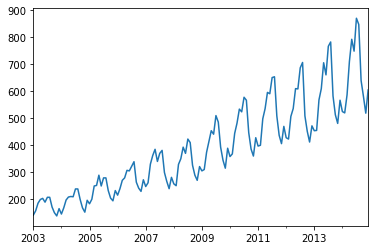

In [22]:
ts_sales.plot()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
decompose = seasonal_decompose(ts_sales)

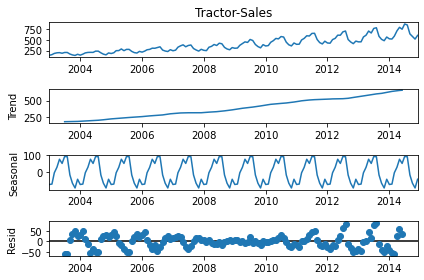

In [40]:
decompose.plot();

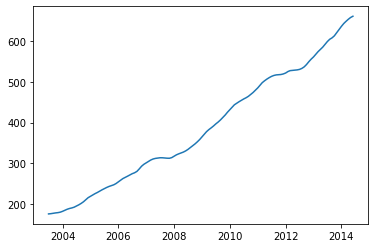

In [37]:
plt.plot(decompose.trend)

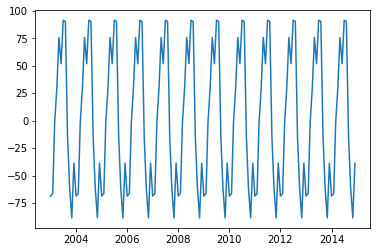

In [38]:
plt.plot(decompose.seasonal)

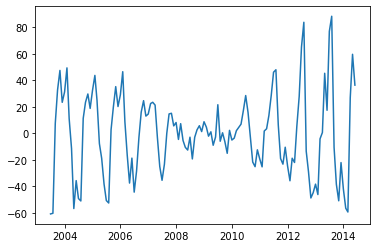

In [39]:
plt.plot(decompose.resid)

#### Simple Moving Average
#### Rolling Stats

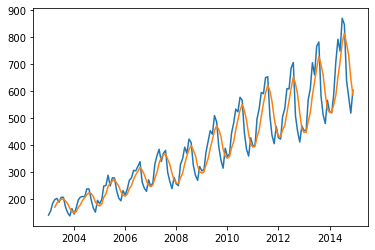

In [49]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=4).mean())

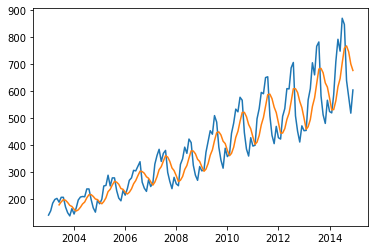

In [50]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=6).mean())

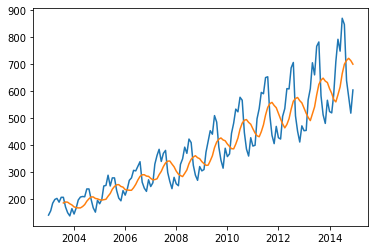

In [51]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=8).mean())

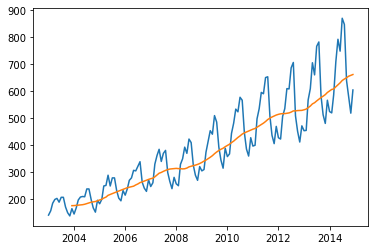

In [52]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).mean())